In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 3.7 MB/s eta 0:00:00


In [13]:
import os
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [2]:
def create_folder(folder_name):
  folder_path = f"/content/{folder_name}"
  os.makedirs(folder_path)

# create_folder("data/images/train")
# create_folder("data/images/val")
# create_folder("data/labels/train")
# create_folder("data/labels/val")
# create_folder("labels_output")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
ROOT_DIR = '/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO_notebooks'

# masks to polygons

In [10]:
# input_dir = f'{ROOT_DIR}/duck_dataset/data/masks/val'
# output_dir = f'{ROOT_DIR}/duck_dataset/data/labels/val'

# input_dir = f'{ROOT_DIR}/duck_dataset/data/masks/train'
# output_dir = f'{ROOT_DIR}/duck_dataset/data/labels/train'

# for j in os.listdir(input_dir):
#     image_path = os.path.join(input_dir, j)
#     # load the binary mask and get its contours
#     mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     _, mask = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)

#     H, W = mask.shape
#     contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # convert the contours to polygons
#     polygons = []
#     for cnt in contours:
#         if cv2.contourArea(cnt) > 200:
#             polygon = []
#             for point in cnt:
#                 x, y = point[0]
#                 polygon.append(x / W)
#                 polygon.append(y / H)
#             polygons.append(polygon)

#     # print the polygons
#     with open('{}.txt'.format(os.path.join(output_dir, j)[:-4]), 'w') as f:
#         for polygon in polygons:
#             for p_, p in enumerate(polygon):
#                 if p_ == len(polygon) - 1:
#                     f.write('{}\n'.format(p))
#                 elif p_ == 0:
#                     f.write('0 {} '.format(p))
#                 else:
#                     f.write('{} '.format(p))

#         f.close()

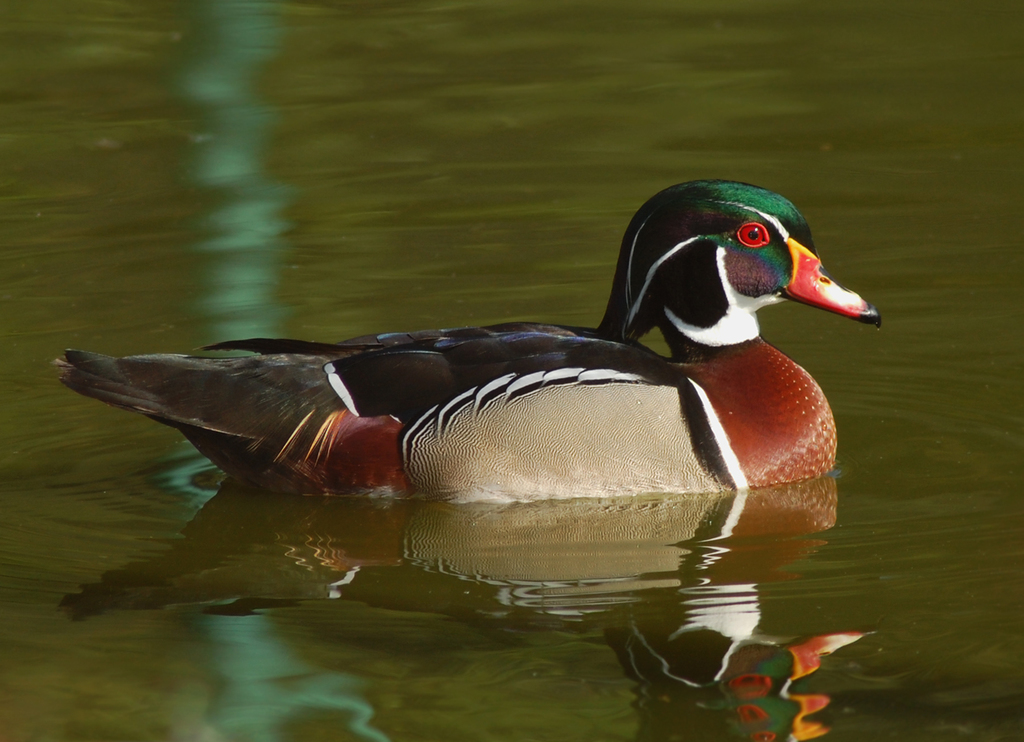

In [21]:
# temp_path = '/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO_notebooks/duck_dataset/data/images/train/1be566eccffe9561.jpg'
# temp_path = '/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO_notebooks/duck_dataset/data/images/val/d883ca6326d3378d.jpg'
temp_path = '/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO_notebooks/duck_dataset/data/images/val/d4e93400ba76ae3d.jpg'

image = cv2.imread(temp_path)
cv2_imshow(image)

# train

In [ ]:
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

yaml_file = "/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO_notebooks/duck_dataset/google_colab_config.yaml"
model.train(data=yaml_file, epochs=100, imgsz=640)


In [ ]:
# !scp -r /content/runs '/content/gdrive/MyDrive/Colab_Notebooks/WorkerAI/YOLO'

# test


0: 480x640 1 duck, 12.1ms
Speed: 4.1ms preprocess, 12.1ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)


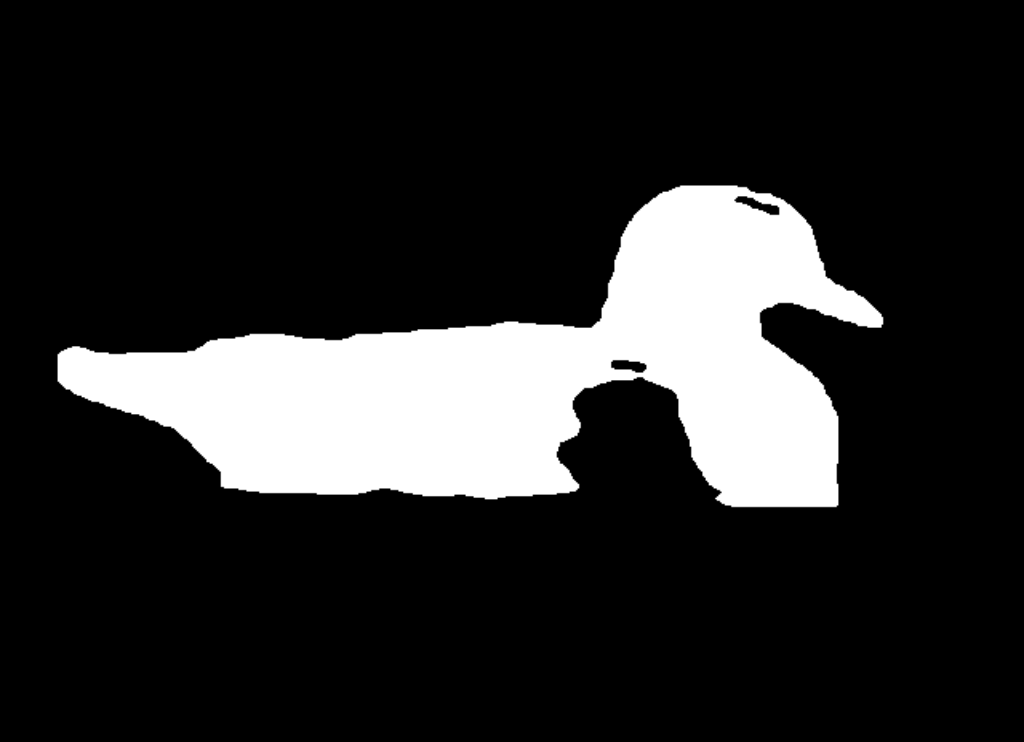

In [22]:
model_path = f'{ROOT_DIR}/duck_dataset/weights/last.pt'

image_path = temp_path

img = cv2.imread(image_path)
H, W, _ = img.shape

model = YOLO(model_path)

results = model(img)

for result in results:
    for j, mask in enumerate(result.masks.data):

        mask = mask.cpu().numpy() * 255

        mask = cv2.resize(mask, (W, H))

        # cv2.imwrite('./output.png', mask)
        cv2_imshow(mask)